# Importing All The Required Libraries

In [1]:
#!pip install chart_studio
#!pip install pycountry
#!pip install bar_chart_race
#!pip install cufflinks

In [2]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading The DataSet

In [3]:
city_day = pd.read_csv('city_day.csv')
cities_db = pd.read_csv('cities_data.csv')

In [4]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Missing Values 

In [5]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16807,64.100000
PM10,10766,41.100000
NH3,9847,37.600000
Toluene,7555,28.800000
Benzene,5287,20.200000
PM2.5,4289,16.400000
AQI,4282,16.300000
AQI_Bucket,4282,16.300000
NOx,4043,15.400000
O3,3660,14.000000


# Filling Missing Values

In [6]:
from sklearn.impute import KNNImputer
def fill_missing_values_table():
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
    for col in city_day.columns:
        if city_day[col].dtype=="O":
            continue
        else:
            city_day[col]=knn_imputer.fit_transform(city_day[[col]])
    city_day['AQI_Bucket'] = city_day['AQI_Bucket'].fillna("Not Known")
fill_missing_values_table()

In [7]:
missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000,26219.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,61.422755,72.302094,21.611332,23.564338,30.069468,21.421764,7.103698,17.750669,19.839940,14.921413,17.833997,3.980603,133.677141
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,35.315000,88.520000,6.540000,13.120000,15.190000,13.765000,0.560000,6.000000,20.950000,0.260000,1.370000,2.320000,92.000000
50%,62.440000,125.492380,11.910000,25.400000,28.810000,25.336162,1.000000,10.550000,34.374248,1.760000,7.010000,3.155895,150.000000
75%,76.750000,125.492380,18.232528,34.800000,37.290000,25.336162,1.850000,14.988734,42.510000,3.300132,9.029794,3.155895,196.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Number of Cities in the Dataset

In [9]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 24
Index(['Lucknow', 'Mumbai', 'Chennai', 'Ahmedabad', 'Delhi', 'Bengaluru',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam',
       'Aizawl'],
      dtype='object')


# Convert String to Datetime

In [10]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)


In [11]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-05-01 00:00:00


# Combine all parameters


In [12]:

city_day['Parameter'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']+city_day['PM2.5']+city_day['PM10']+city_day['NO']+city_day['NO2']+city_day['NH3']+city_day['CO']+city_day['SO2']+city_day['O3']

city_day.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Parameter
0,Ahmedabad,2015-01-01,71.828907,125.49238,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908,Not Known,403.73745
1,Ahmedabad,2015-01-02,71.828907,125.49238,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908,Not Known,311.84745
2,Ahmedabad,2015-01-03,71.828907,125.49238,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908,Not Known,361.97745
3,Ahmedabad,2015-01-04,71.828907,125.49238,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908,Not Known,314.77745
4,Ahmedabad,2015-01-05,71.828907,125.49238,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908,Not Known,395.59745


In [13]:
def plot_scatter(pollutants):
    if (not(city_day.index.name == 'Date')):
        city_day.set_index('Date',inplace=True)       
    
    axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
    for ax in axes:    
        ax.set_xlabel('Years')
        ax.set_ylabel('ug / m3')

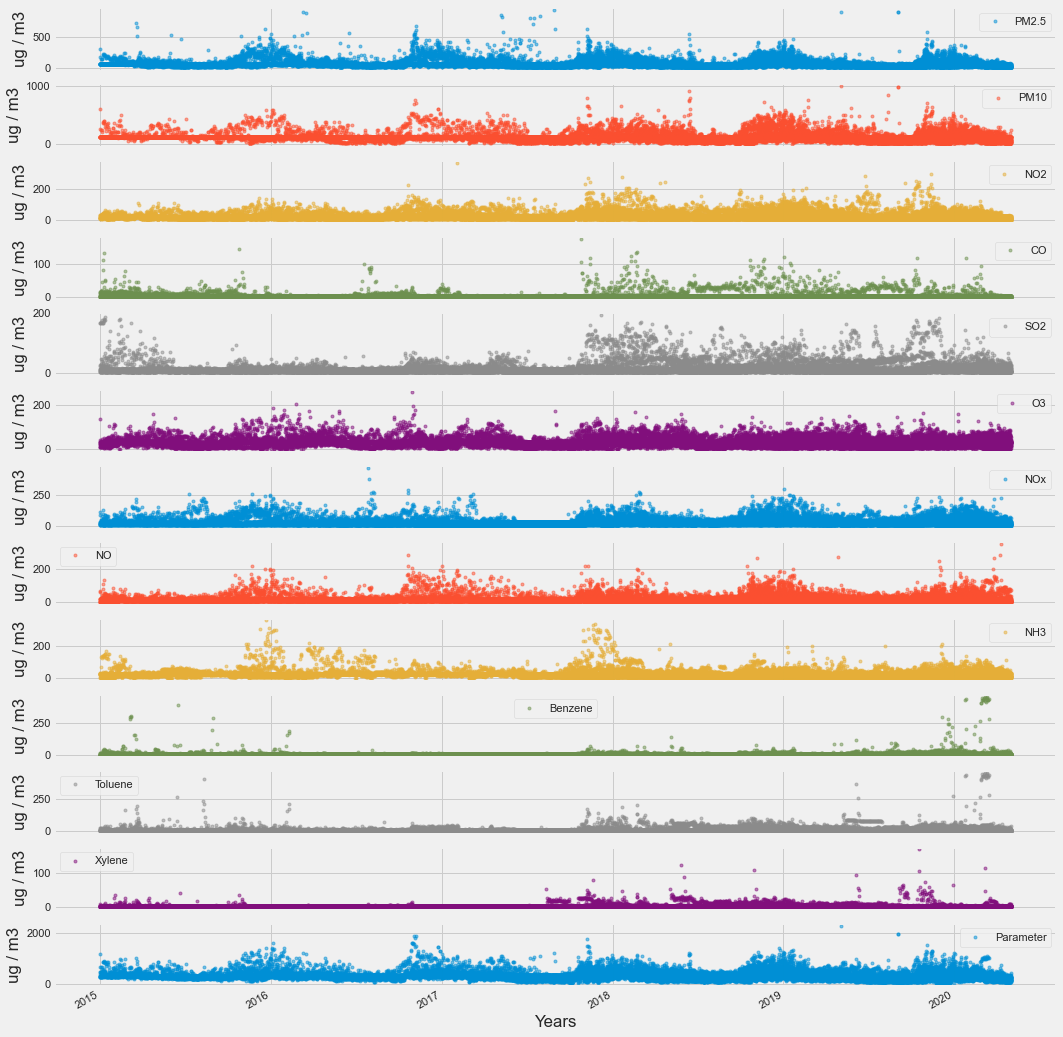

In [14]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3','NOx','NO','NH3','Benzene','Toluene','Xylene', 'Parameter']
plot_scatter(pollutants)

# AQI for some of the major cities of India

In [15]:
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Parameter
Date,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,71.828907,125.49238,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908,Not Known,403.73745
2015-01-02,Ahmedabad,71.828907,125.49238,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908,Not Known,311.84745
2015-01-03,Ahmedabad,71.828907,125.49238,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908,Not Known,361.97745
2015-01-04,Ahmedabad,71.828907,125.49238,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908,Not Known,314.77745
2015-01-05,Ahmedabad,71.828907,125.49238,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908,Not Known,395.59745


In [16]:
cities = ['Delhi','Bengaluru','Mumbai','Hyderabad','Chennai','Kolkata']
city_day.reset_index(inplace=True)
filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
5511,2019-01-01,Bengaluru,128.0,Moderate
5512,2019-01-02,Bengaluru,103.0,Moderate
5513,2019-01-03,Bengaluru,101.0,Moderate
5514,2019-01-04,Bengaluru,106.0,Moderate
5515,2019-01-05,Bengaluru,104.0,Moderate


In [17]:
AQI.tail()

,Date,City,AQI,AQI_Bucket
22253,2020-04-27,Mumbai,60.0,Satisfactory
22254,2020-04-28,Mumbai,60.0,Satisfactory
22255,2020-04-29,Mumbai,77.0,Satisfactory
22256,2020-04-30,Mumbai,68.0,Satisfactory
22257,2020-05-01,Mumbai,64.0,Satisfactory


In [18]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
#AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=('Delhi','Bengaluru','Mumbai','Hyderabad','Chennai','Kolkata'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Kolkata'],
                    marker=dict(color=AQI_pivot['Kolkata'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='hot'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

# AQI before and after lockdown

In [19]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
AQI_pivot.tail()

City,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Date,,,,,,
2020-04-27,59.0,60.0,98.0,56.0,44.0,60.0
2020-04-28,71.0,68.0,105.0,56.0,45.0,60.0
2020-04-29,62.0,69.0,123.0,51.0,51.0,77.0
2020-04-30,61.0,70.0,128.0,59.0,54.0,68.0
2020-05-01,75.0,65.0,144.0,71.0,69.0,64.0


In [20]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Kolkata      184.094118
Mumbai       148.776471
dtype: float64
City
Bengaluru     68.513514
Chennai       62.189189
Delhi        107.378378
Hyderabad     65.675676
Kolkata       75.648649
Mumbai        73.972973
dtype: float64


In [21]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [22]:
AQI_Bucket = city_day['AQI_Bucket'].value_counts()
print(f'Total number of cities in the dataset : {len(AQI_Bucket)}')
print(AQI_Bucket.index)

Total number of cities in the dataset : 7
Index(['Moderate', 'Satisfactory', 'Not Known', 'Poor', 'Very Poor', 'Severe',
       'Good'],
      dtype='object')


In [23]:
def gauge(aqi_value_before,aqi_value_after,aqi_bucket_before,aqi_bucket_after,title):
    
    fig = go.Figure()

    fig.add_trace(go.Indicator(
    mode = "number+gauge", value = aqi_value_before,
    domain = {'x': [0.25, 1], 'y': [0.08, 0.25]},
    title = {'text': aqi_bucket_before},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 500]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 200},
        'steps': [
            {'range': [0, 50], 'color': "green"},
            {'range': [51, 100], 'color': "lightgreen"},
            {'range': [101, 200], 'color': "yellow"},
            {'range': [201, 300], 'color': "orange"},
            {'range': [301, 400], 'color': "red"},
            {'range': [401, 500], 'color': "darkred"}],
        'bar': {'color': "black"}}))

    fig.add_trace(go.Indicator(
    mode = "number+gauge", value = aqi_value_after,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': aqi_bucket_after},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 500]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 200},
        'steps': [
            {'range': [0, 50], 'color': "green"},
            {'range': [51, 100], 'color': "lightgreen"},
            {'range': [101, 200], 'color': "yellow"},
            {'range': [201, 300], 'color': "orange"},
            {'range': [301, 400], 'color': "red"},
            {'range': [401, 500], 'color': "darkred"}],
        'bar': {'color': "black"}}))


    fig.update_layout(title_text=title,height = 600)
    fig.show()
    

In [24]:
import plotly.graph_objects as go

In [25]:
gauge(aqi_value_before = 107,aqi_value_after = 246,aqi_bucket_before = 'Moderate',aqi_bucket_after = 'After',title = 'Delhi AQI before and After Lockdown')


In [26]:
gauge(aqi_value_before = 96,aqi_value_after = 68,aqi_bucket_before = 'Satisfatory',aqi_bucket_after = 'Satisfactory',title = 'Bengaluru AQI before and After Lockdown')


In [27]:
gauge(aqi_value_before = 80,aqi_value_after = 62,aqi_bucket_before = 'Satisfatory',aqi_bucket_after = 'Satisfatory',title = 'Chennai AQI before and After Lockdown')


In [28]:
gauge(aqi_value_before = 94,aqi_value_after = 65,aqi_bucket_before = 'Satisfatory',aqi_bucket_after = 'Satisfatory',title = 'Hyderabad AQI before and After Lockdown')


In [29]:
gauge(aqi_value_before = 148,aqi_value_after = 73,aqi_bucket_before = 'Moderate',aqi_bucket_after = 'Satisfatory',title = 'Mumbai AQI before and After Lockdown')


In [30]:
gauge(aqi_value_before = 184,aqi_value_after = 75,aqi_bucket_before = 'Moderate',aqi_bucket_after = 'Satisfatory',title = 'Kolkata AQI before and After Lockdown')


In [31]:
#city_day.set_index('Date',inplace=True)

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);

pollutants_filtered_2019['month'] = pollutants_filtered_2019.index.to_series().dt.strftime('%b %d')
pollutants_filtered_2020['month'] = pollutants_filtered_2020.index.to_series().dt.strftime('%b %d')

df_2019 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO' , 'month' , 'AQI']]
df_2020 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO', 'month', 'AQI']]
df_2019.head()

,City,NO2,SO2,PM2.5,CO,month,AQI
Date,,,,,,,
2019-01-01,Bengaluru,38.19,8.29,61.55,0.98,Jan 01,128.0
2019-01-02,Bengaluru,39.73,10.22,47.27,1.06,Jan 02,103.0
2019-01-03,Bengaluru,46.55,8.15,48.86,1.01,Jan 03,101.0
2019-01-04,Bengaluru,45.87,5.76,51.35,1.09,Jan 04,106.0
2019-01-05,Bengaluru,41.74,6.13,46.57,1.03,Jan 05,104.0


In [32]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_2020.month, y=df_2020[df_2020['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2 2020'))
    fig.add_trace(go.Scatter(x=df_2019.month, y=df_2019[df_2019['City']==city]['NO2'],
                    line=dict(dash='solid',color='red'),name='NO2 2019'))
    fig.update_layout(title_text=city+' 2019 and 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')  
    fig.show()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_2020.month, y=df_2020[df_2020['City']==city]['SO2'],
                    line=dict(dash='solid',color='green'),name='SO2 2020'))
    fig.add_trace(go.Scatter(x=df_2019.month, y=df_2019[df_2019['City']==city]['SO2'],
                    line=dict(dash='solid',color='red'),name='SO2 2019'))
    
    fig.update_layout(title_text=city+' 2019 and 2020',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')  
    fig.show()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_2020.month, y=df_2020[df_2020['City']==city]['PM2.5'],
                    line=dict(dash='solid',color='green'),name='PM2.5 2020'))
    fig.add_trace(go.Scatter(x=df_2019.month, y=df_2019[df_2019['City']==city]['PM2.5'],
                    line=dict(dash='solid',color='red'),name='PM2.5 2019'))
    
    fig.update_layout(title_text=city+' 2019 and 2020',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')  
    fig.show()
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_2020.month, y=df_2020[df_2020['City']==city]['CO'],
                    line=dict(dash='solid',color='green'),name='CO 2020'))
    fig.add_trace(go.Scatter(x=df_2019.month, y=df_2019[df_2019['City']==city]['CO'],
                    line=dict(dash='solid',color='red'),name='CO 2019'))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_2020.month, y=df_2020[df_2020['City']==city]['AQI'],
                    line=dict(dash='solid',color='green'),name='AQI 2020'))
    fig.add_trace(go.Scatter(x=df_2019.month, y=df_2019[df_2019['City']==city]['AQI'],
                    line=dict(dash='solid',color='red'),name='AQI 2019'))
    
    fig.update_layout(title_text=city+' 2019 and 2020',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')  
    fig.show()
    


In [33]:
pollution_comparison('Bengaluru')

# AIR Pollution in India

In [34]:
city_day['year'] = city_day['Date'].dt.year

# Group By Using Median

In [35]:
city_day['year'] = city_day['year'].astype(str)
temp = city_day.groupby(['year'])[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 
                                                  'NH3', 'CO', 'SO2','O3', 'Benzene', 
                                                  'Toluene', 'Xylene', 'AQI']].median()
temp.style.background_gradient(cmap="Reds")

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
year,,,,,,,,,,,,,
2015,71.828907,125.492380,11.630000,21.290000,22.270000,25.336162,1.720000,9.900000,33.710000,2.020000,4.400000,3.155895,175.840908
2016,71.828907,125.492380,13.240000,29.009102,24.250000,25.336162,1.220000,8.025000,34.374248,1.820000,4.715000,3.155895,175.840908
2017,71.828907,125.492380,13.300000,29.009102,33.657667,25.336162,0.660000,10.360000,34.374248,1.260000,2.860000,3.155895,175.840908
2018,63.175000,125.492380,12.685000,28.180000,31.770000,25.336162,1.010000,11.770000,34.374248,1.740000,9.029794,3.155895,141.000000
2019,47.430000,114.085000,10.910000,21.080000,28.110000,19.145000,0.950000,10.775000,31.040000,1.850000,9.029794,3.155895,116.000000
2020,45.365000,97.835000,10.105000,17.320000,23.645000,18.455000,0.870000,10.520000,34.374248,2.000000,8.820000,3.155895,110.000000


# Group By Using Mean

In [36]:
city_day['year'] = city_day['year'].astype(str)
temp = city_day.groupby(['year'])[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 
                                                  'NH3', 'CO', 'SO2','O3', 'Benzene', 
                                                  'Toluene', 'Xylene', 'AQI']].mean()
temp.style.background_gradient(cmap="Reds")

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
year,,,,,,,,,,,,,
2015,79.445626,136.556001,16.849870,24.566334,35.488267,30.581484,4.151287,13.768257,33.159203,4.068616,7.476890,2.451594,199.728327
2016,89.648445,134.549748,19.271730,30.197579,31.330925,31.705195,1.925166,10.553970,36.854733,2.375096,6.232490,2.338817,196.129243
2017,83.259862,127.868357,17.991216,31.189565,29.332351,28.532662,1.486470,13.051996,33.803753,1.982601,5.645649,3.051483,181.257237
2018,70.686790,131.420695,19.116104,32.644201,37.149058,23.534563,3.096674,18.187106,34.950919,2.698029,10.435522,3.815949,185.087023
2019,60.958400,117.363502,16.787155,28.428700,33.782791,20.982159,2.412149,16.666449,33.308743,3.352405,10.678866,3.530416,161.274723
2020,54.883484,107.244594,20.377161,22.225404,33.324009,22.301360,1.506405,13.331254,34.909345,6.818759,11.967067,2.626569,135.560652


# Plotting the data on line chart daywise

In [37]:
temp = city_day[city_day['Date']>="2020-01-20"]

temp = temp.groupby(['Date'])[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene',"AQI"]].median().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp["Date"],y=temp["PM2.5"],
                        mode='lines+markers',name="PM2.5"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["PM10"],
                        mode='lines+markers',name="PM10"))
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])
fig.update_layout(title={'text':'Change in PM2.5 and PM10 after 25th March'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

#Nitrogen Oxides
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp["Date"],y=temp["NO"],
                        mode='lines+markers',name="NO"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["NO2"],
                        mode='lines+markers',name="NO2"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["NOx"],
                        mode='lines+markers',name="NOx"))
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])
fig.update_layout(title={'text':'Change in nitrogne oxides levels after 25th March'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

#Ammonia,Carbon Monoxide and Sulphur Dioxide and Ozone
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp["Date"],y=temp["NH3"],
                        mode='lines+markers',name="NH3"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["CO"],
                        mode='lines+markers',name="CO"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["SO2"],
                        mode='lines+markers',name="SO2"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["O3"],
                        mode='lines+markers',name="O3"))
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])
fig.update_layout(title={'text':'Change in NH3,CO,SO2,O3 levels after 25th March'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

#Benzene,Toluene,Xylene
fig = go.Figure()

fig.add_trace(go.Scatter(x=temp["Date"],y=temp["Benzene"],
                        mode='lines+markers',name="Benzene"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["Toluene"],
                        mode='lines+markers',name="Toluene"))
fig.add_trace(go.Scatter(x=temp["Date"],y=temp["Xylene"],
                        mode='lines+markers',name="Xylene"))
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])
fig.update_layout(title={'text':'Change in benzene,toluene,xylene levels after 25th March'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()